In [137]:
# import the necessary packages
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt

# to display directly in the notebook
%matplotlib inline 

plt.rcParams['figure.figsize'] = [15.0, 10.0]
#plt.rcParams['image.cmap'] = 'gray' 

# 1. Données artificielles et réelles 

### Q 1.1 Génération aléatoire :

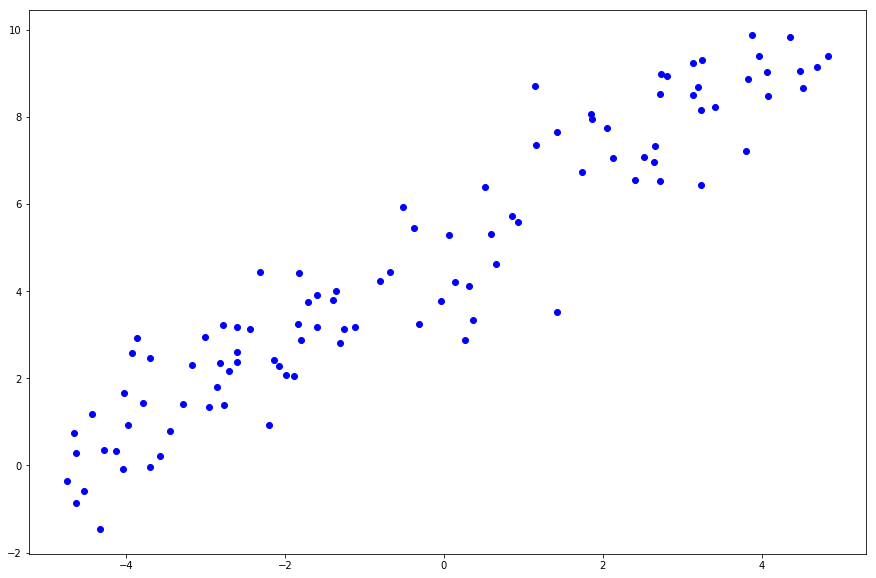

In [138]:
def gen_linear (a, b, eps, nbex):
    
    X = np.random.uniform(-5,5,nbex)
    X.reshape(-1,1)
    
    eps1 = np.random.normal(0, eps, nbex)
    
    Y = a*X + b + eps1
    return [X, Y]

def question11 ():
    a = 1
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear (a, b, eps, nbex)
    plt . figure ()
    plt . scatter (X , Y, color='blue' )
    
question11()

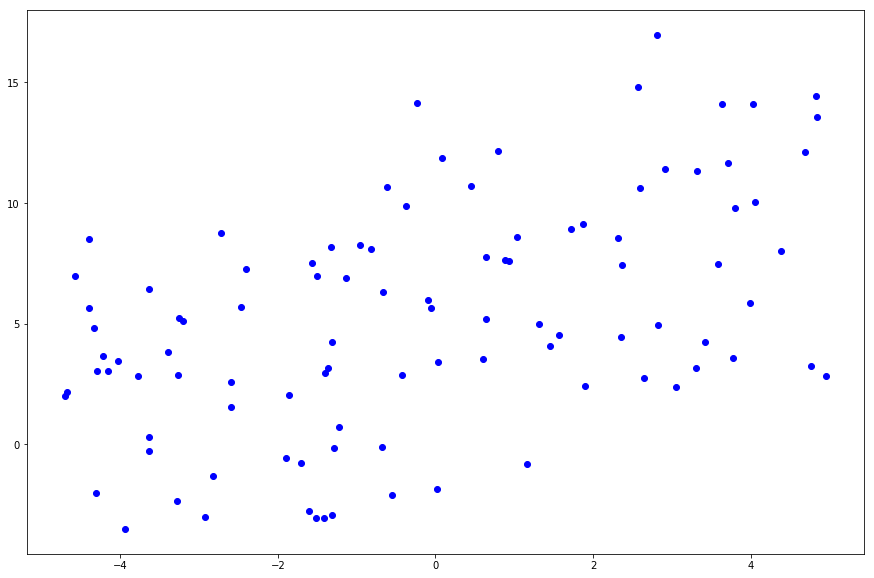

In [140]:
def gen_linear_general (a, b, eps, nbex, d):
    
    X = np.random.uniform(-5,5,[nbex, d])
    
    eps1 = np.random.normal(0, eps, nbex)
    eps1.reshape(-1,1)
    
    Y = np.dot(X, a.T) + b + eps1
    return [X, Y]

def question11_general ():
    d = 3
    a = np.ones(d)
    a.reshape(-1,1)
    
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear_general (a, b, eps, nbex, d)
    plt . figure ()
    plt . scatter (X[:,1] , Y, color='blue' )
    
question11_general ()

### Q 1.2 Données réelles :

In [5]:
# Descriptions des attributs :
# 1 - crim : per capita crime rate by town .
# 2 - zone : proportion of residential land zoned for lots over 25 ,000 sq . ft .
# 3 - indus : proportion of non - retail business acres per town .
# 4 - chas : Charles River dummy variable (= 1 if tract bounds river ; 0 otherwise ).
# 5 - nox : nitrogen oxides concentration ( parts per 10 million ).
# 6 - room : average number of rooms per dwelling .
# 7 - age : proportion of owner - occupied units built prior to 1940.
# 8 - empldist : weighted mean of distances to five Boston employment centres .
# 9 - radiushighway : index of accessibility to radial highways .
# 10 - taxproperty : full - value property - tax rate per $10 ,000.
# 11 - teacherratio : pupil - teacher ratio by town .
# 12 - blackprct : 1000( Bk - 0.63)^2 where Bk is the proportion of blacks by town .
# 13 - lowerstatus : lower status of the population ( percent ).
# Y - medianvalue : ( target value ) median value of owner - occupied homes in $1000s .

def read_file ( fn ):
    with open ( fn ) as f :
        names = f . readline ()
        X = np . array ([[ float ( x ) for x in l . strip (). split (" ")] for l in f . readlines ()])
    return X [: ,: -1] , X [: , -1]. reshape ( -1)

In [7]:
def plot_nuages (X, m = 3):
    
    plt.rcParams['figure.figsize'] = [25.0, 25.0]
    
    plt.figure()
    
    n = X.shape[1]
    titles = ['Crim', 'Zone', 'Indus', 'Chas', 'Nox', 'Room', 'Age',
          'Empldist', 'Radiushighway', 'Taxproperty', 'Teacherratio', 
          'Blackprct', 'Lowerstatus']
    
    for i in range(m):
        for j in range(m):
            plt.subplot(n ,n ,j+1)
            plt.scatter (X[:,i], X[:,j])
            plt.title(titles[j])
            plt.ylabel(titles[i])
            plt.xticks([]),plt.yticks([])
        
        plt.show()   

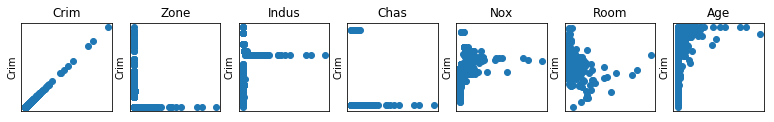

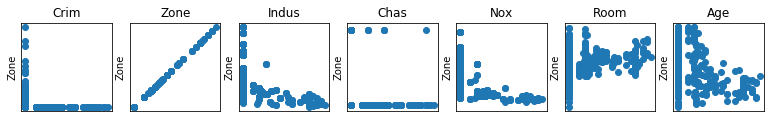

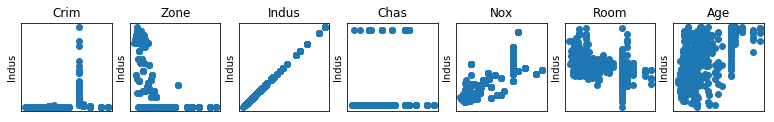

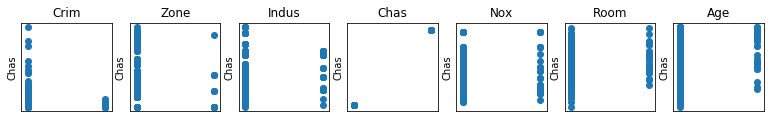

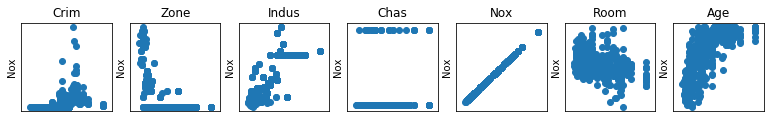

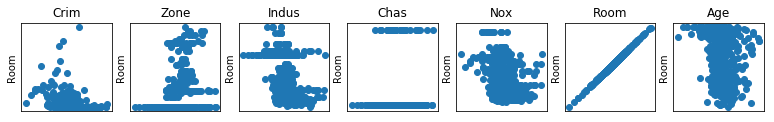

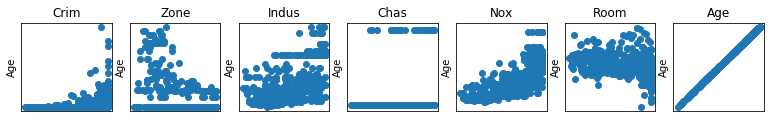

In [46]:
#  добавить комментарий !!!
def question12 (m=3):
    X_BH, Y_BH = read_file ('housing.csv')
    
    plot_nuages (X_BH, m)
    
    return [X_BH, Y_BH]
    
X_BH, Y_BH = question12 (7)

# 2 Régression linéaire

La régression linéaire suppose une relation linéaire entre la valeur à prédire - l’étiquette - et les différentes dimensions. La forme générique est donc $$ f_w(X) = w_0*1 + \sum_{i=1}^{d} w_i x_i $$ avec $ w \in R^{d+1}$ le vecteur de
paramètres.

$$ \hat{Y} = f_w(X) = Xw $$

$$ L(X, Y, w) = \frac{1}{2d} \sum_{i=1}^{d} (y_i  - w^T x_i)^2 = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2}  = \frac{1}{2d} (Y - Xw)^T(Y - Xw)
$$ 

$$
\frac{\partial L}{\partial w} = \frac{1}{2d} (-2X^TY+2X^TXw) 
$$

$$
\frac{\partial L}{\partial w} = 0 <=> w = (X^TX)^{-1}X^TY
$$


### Q 2.1 (Préambule)

In [85]:
def predict (w,X):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    return np.dot(X_dot, w)

def mse(yhat,y):
    return 0.5*np.mean((y-yhat)**2)

def regress(X,Y):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    w = np.dot(np.dot(LA.pinv(np.dot(X_dot.T, X_dot)),X_dot.T),Y)
    
    return w   

### Q 2.2 Données artificielles

C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


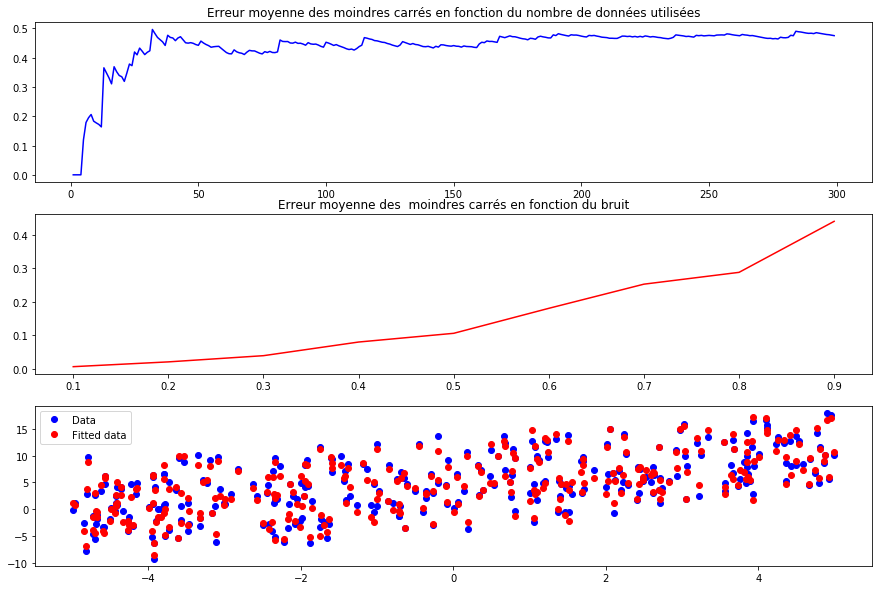

In [147]:
# Evolution de l’erreur moyenne des moindres carrés en fonction du nombre de données utilisées
def eval_data_art_N (a, b, d, eps, nbex): 
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    
    result = np.zeros(nbex)
    grille = np.arange(0, nbex, 1)
    
    for n in grille:
        w_art = regress(X_art[0:n, :] , Y_art[0:n])
        result[n] = mse(predict(w_art, X_art[0:n, :]), Y_art[0:n])
    
    return [grille, result]

# Evolution de l’erreur moyenne des  moindres carrés en fonction du bruit
def eval_data_art_eps (a, b, d, eps, nbex): 
    
    grille = np.arange(0.1, eps, 0.1)
    result = np.zeros(grille.size)
    
    for i in range(grille.size):
        X_art , Y_art = gen_linear_general (a, b, grille[i], nbex, d)
        w_art_eps = regress(X_art, Y_art)

        result[i] = mse(predict(w_art_eps, X_art), Y_art)
    
    return [grille, result] 
    
def question221 ():
    d = 3
    a = np.ones(d)
    a.reshape(-1,1)
    b = 5
    
    eps = 1
    nbex = 300
    
    grille_N, eval_N = eval_data_art_N (a, b, d, eps, nbex)
    
    grille_eps, eval_eps = eval_data_art_eps (a, b, d, eps, nbex)
    
    ax1 = plt.subplot(311)
    ax1.plot(grille_N , eval_N, color='blue')
    ax1.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    
    ax2 = plt.subplot(312)
    ax2.plot(grille_eps , eval_eps, color='red' )
    ax2.set_title('Erreur moyenne des  moindres carrés en fonction du bruit')
    
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    ax3 = plt.subplot(313)
    ax3.plot(X_art[:,1] , Y_art, 'bo', label='Data')
    ax3.plot(X_art[:,1], predict(regress(X_art, Y_art), X_art) , 'ro', label='Fitted data')
    ax3.legend()
    
    plt.show()

question221 ()

In [ ]:
def question22 ():
    pass
    
question22 ()

### Q 2.3 Données réelles

In [148]:
w_BH = regress(X_BH, Y_BH)

# 3 Ridge Régression


Si la matrice $X^TX$ est non inversible (ou singulière) le problème de régression linéaire n'est pas bien posé et on ne peut pas utiliser la definition de $w$ précédente. On a besoin d'utiliser régularisation :

$$ L(X, Y, w) = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2} + \lambda ||w||_{2}^{2}
$$ 

$$
w = (X^TX + \lambda E)^{-1}X^T Y
$$


In [ ]:
def ridge_regress(X,Y,lmb):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    XTX = np.dot(X_dot.T, X_dot)
    I = np.eye(XTX.shape[0])
    
    w = np.dot(np.dot(LA.pinv(XTX + lmb*I),X_dot.T),Y)
    
    return w   

In [ ]:
plot(logy=True)

# 4 LASSO

Le Lasso remplace la norme $l_2$ au carré par une norme $l_1$. On résout dans ce cas le problème suivant :

$$
\hat f = argmin_w \frac{1}{2n} \sum_{i=1}^{n} ||Xw-Y||_2^2 + \lambda||w||_1 , \ avec \ ||w||_1 = \sum_{i=0}^{d} |w_i|
$$

# 5 Classification plug-in

On considère dans cette partie un problème de classification binaire à valeur dans $Y = \{−1, +1\}$. Nous noterons $η(x) = P(y = 1 | \ x) \ et \ X = \{x^i, y^i\}^{N}_{i=1}$ l’ensemble d’apprentissage. Dans le cadre de la classification plug-in, le problème de classification est vu comme un problème de régression
aux moindres carrés : il s’agit de trouver la fonction linéaire $f_w = \sum_{i=1}^{d} w_i x_i + w_0$ qui minimise $ E[(f_w(x) − y)^2]$ (soit trouver fw qui approxime au mieux $2η(x) − 1$ ).

- Inférence : le signe de $f_w(x)$ conduit à la classification de $x : +1$ si positif, $−1$ sinon.
- Coût à optimiser : $L(w, X) = \sum_{i=1}^{N} (f_w(x) − y)^2 = \sum_{i=1}^{N} (w_0 +\sum_{j=1}^{d} w_j x_j^i− y^i)^2 $


In [164]:
def load_usps ( filename ):
    with open ( filename ,"r") as f :
        f . readline ()
        data =[ [ float ( x ) for x in l . split ()] for l in f if len ( l . split ()) >2]
    tmp = np . array ( data )
    return tmp [: ,1:] , tmp [: ,0]. astype ( int )

def show_usps ( data ):
    plt . imshow ( data . reshape ((16 ,16)), interpolation ='nearest', cmap ='gray')

In [154]:
X_USPS_train, Y_USPS_train = load_usps('USPS_train.txt')
X_USPS_test, Y_USPS_test = load_usps('USPS_test.txt')

3


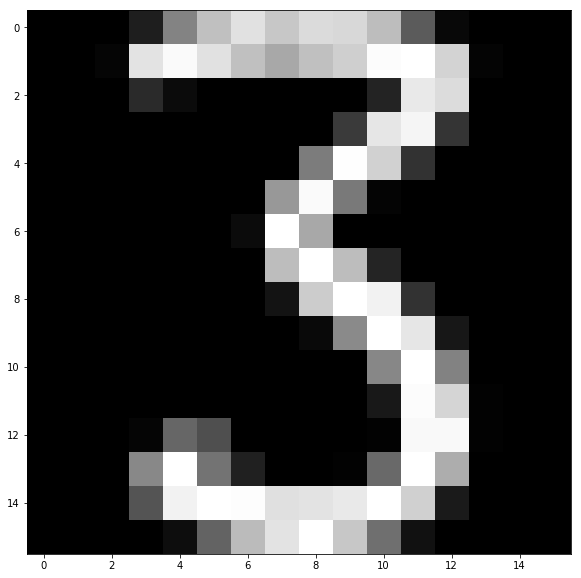

In [167]:
show_usps(X_USPS_train[1300,:])
print(Y_USPS_train[1300])